In [65]:
#Lito Biala
#Data Analytics and Visualization Cohort 3
#Homework 5

In [25]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(city_df, ride_df, on= "city")
# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


pandas.core.groupby.groupby.DataFrameGroupBy

## Bubble Plot of Ride Sharing Data

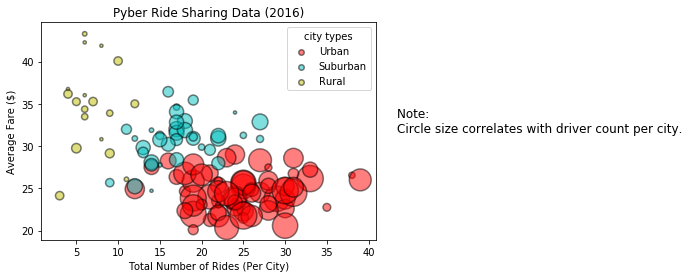

In [31]:
# Obtain the x and y coordinates for each of the three city types
#x
rides = merged_df.groupby("city")["ride_id"].count()
#y
fare = merged_df.groupby("city")["fare"].mean()

drivers = merged_df.groupby("city")["driver_count"].mean()

citytypes = merged_df.groupby("city")["type"].max()

city_analysis = pd.DataFrame({
    "Number of Rides": rides,
    "Average Fare": fare,
    "Number of Drivers": drivers,
    "Type of City": citytypes})

urban = city_analysis.loc[city_analysis["Type of City"] == "Urban"]
suburban = city_analysis.loc[city_analysis["Type of City"] == "Suburban"]
rural = city_analysis.loc[city_analysis["Type of City"] == "Rural"]

urban_rides = urban["Number of Rides"]
suburban_rides = suburban["Number of Rides"]
rural_rides = rural["Number of Rides"]

urban_fare = urban["Average Fare"]
suburban_fare = suburban["Average Fare"]
rural_fare = rural["Average Fare"]

urban_drivers = urban["Number of Drivers"]
suburban_drivers = suburban["Number of Drivers"]
rural_drivers = rural["Number of Drivers"]

city_analysis.head()
# Build the scatter plots for each city types
urban_scatter_plot = plt.scatter(urban_rides, urban_fare, s=urban_drivers*10, 
                         color="r", alpha=0.5, edgecolor="black", linewidths=1.5, 
                         label="Urban")
suburban_scatter_plot = plt.scatter(suburban_rides, suburban_fare, s=suburban_drivers*10, 
                         color="c", alpha=0.5, edgecolor="black", linewidths=1.5, 
                         label="Suburban")
rural_scatter_plot = plt.scatter(rural_rides, rural_fare, s=rural_drivers*10, 
                         color="y", alpha=0.5, edgecolor="black", linewidths=1.5, 
                         label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
Legend = plt.legend(handles=[urban_scatter_plot,suburban_scatter_plot,rural_scatter_plot], loc = "best",title = "city types")
Legend.legendHandles[0]._sizes = [30]
Legend.legendHandles[1]._sizes = [30]
Legend.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.figtext(.95, .5, "Note: \nCircle size correlates with driver count per city.", fontsize=12)
# Save Figure
plt.savefig("Pyber_Data_2016.png", bbox_inches = 'tight')

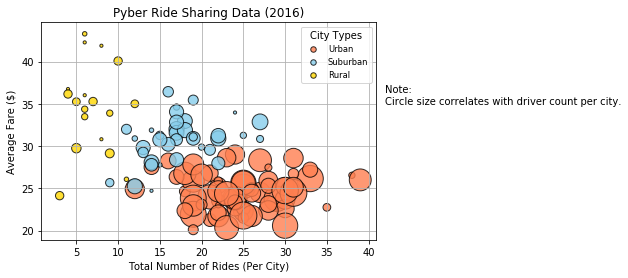

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

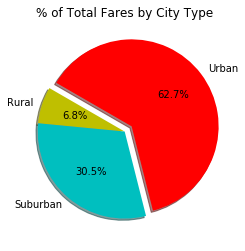

In [59]:
# Calculate Type Percents
grouped_city = merged_df.groupby(["type"])
total_fare = grouped_city["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["y", "c", "r"]
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Pyber_Fares_2016.png")

In [60]:
# Show Figure
plt.show()

## Total Rides by City Type

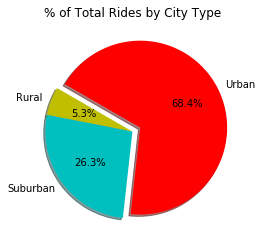

In [61]:
# Calculate Ride Percents
total_rides = grouped_city["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["y", "c", "r"]
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Pyber_Rides_2016.png")

In [62]:
# Show Figure
plt.show()

## Total Drivers by City Type

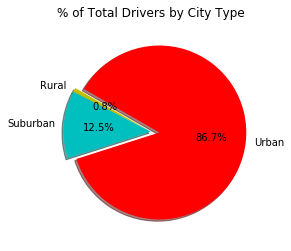

<Figure size 432x288 with 0 Axes>

In [63]:
# Calculate Driver Percents
total_drivers = grouped_city["driver_count"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["y", "c", "r"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.show()
# Save Figure
plt.savefig("Pyber_Drivers_2016.png")

In [64]:
# Show Figure
plt.show()